#XG Boosting of Decision Tree


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
# Load the data and perform label encoding
heart_disease = pd.read_csv('heart_2020_cleaned.csv')


In [ ]:
label_encoder = LabelEncoder()
categorical_features = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity','Asthma', 'KidneyDisease','SkinCancer']


In [ ]:
for column in categorical_features:
    heart_disease[column] = label_encoder.fit_transform(heart_disease[column])


In [ ]:
# Drop unnecessary columns
heart_disease = heart_disease.drop(['AgeCategory', 'Race', 'Diabetic', 'GenHealth'], axis=1)


In [ ]:
# Split the data into training and testing sets
x = heart_disease.drop("HeartDisease", axis=1)
y = heart_disease["HeartDisease"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=42)


In [ ]:
# Create a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(max_depth=50)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=50)

In [ ]:
# Make predictions with the Decision Tree
decision_tree_predictions = decision_tree.predict(x_test)

In [ ]:
# Evaluate the Decision Tree
print("Decision Tree Classification Report:")
print(classification_report(y_test, decision_tree_predictions))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93    146221
           1       0.21      0.18      0.19     13677

    accuracy                           0.87    159898
   macro avg       0.57      0.56      0.56    159898
weighted avg       0.86      0.87      0.87    159898



In [ ]:
# Now, let's use XGBoost with hyperparameter tuning

# Create an XGBoost Classifier
xgb_model = XGBClassifier()

In [ ]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],

    'learning_rate': [0.01, 0.1, 0.2],
}

In [ ]:
# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3)


In [ ]:
# Fit the GridSearchCV object on the training data
grid_search.fit(x_train, y_train)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# Get the best parameters and best estimator from GridSearchCV
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [ ]:
# Make predictions with the best XGBoost model
xgb_predictions = best_estimator.predict(x_test)

In [ ]:
# Evaluate the XGBoost model
print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    146221
           1       0.54      0.05      0.09     13677

    accuracy                           0.92    159898
   macro avg       0.73      0.52      0.52    159898
weighted avg       0.89      0.92      0.88    159898



In [ ]:
# Print the best parameters found by GridSearchCV
print("\nBest Hyperparameters:")
print(best_params)


Best Hyperparameters:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


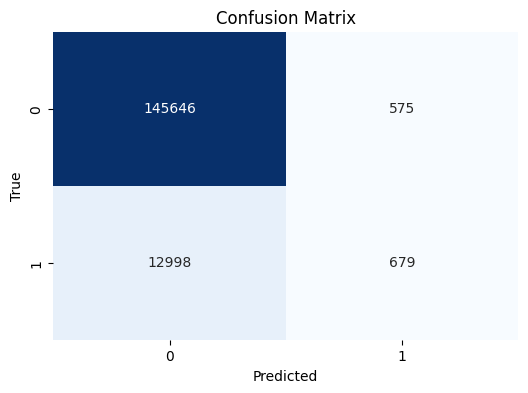

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, xgb_predictions)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()